# W51CA3 2DGaussian Fitting PBCOR

#### ALMA Band 6 (1 mm = 226 GHz) continuum
`/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits`

In [1]:
directory1 = '/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits'

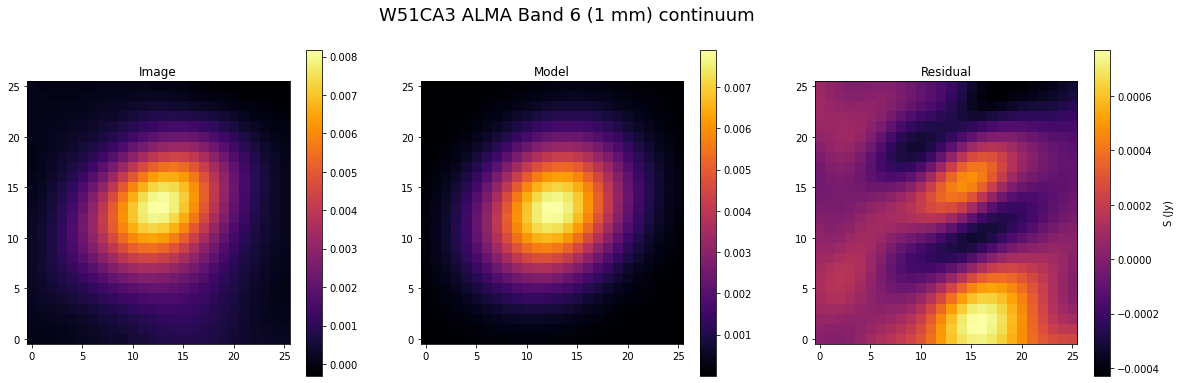

Parameter Error

7.949175317e-03 2.537724792e-04

2.90917076e+02 1.224428804e-07

1.45182376e+01 1.211903920e-07

3.577235901e-06 1.176348935e-07

4.368343544e-06 1.261432863e-07

9.1616016e-01 3.332209776e-01



In [2]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

#Accessing Cube Data
cube = SpectralCube.read(directory1, format='fits')
cube = cube[0,:,:]
x, y = 3295, 3580
size = 13

cube_cutout = cube[y - size:y + size, x - size:x + size]
yy, xx = cube_cutout.spatial_coordinate_map

cord = cube.world[y,x]

p_init_gauss2D = models.Gaussian2D(x_mean=cord[1], y_mean=cord[0], amplitude=0.03 * (u.Jy/u.beam),
                                   x_stddev=1.111111e-5 * u.degree, y_stddev=1.111111e-5 * u.degree, theta=1.5*u.rad)

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout



with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)


p_init_gauss2D.theta.fixed = True

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)

              
plt.figure(figsize=(20, 6))
plt.suptitle("W51CA3 ALMA Band 6 (1 mm) continuum", fontsize=18)

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')

plt.show()

#saveplotfig_gaussianfit()

print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

#### ALMA Band 3 (3mm) continuum

`/orange/adamginsburg/w51/2017.1.00293.S/may2021_successful_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor`




In [ ]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support
import pylab as pl

#Saving methods
directory1 = '/orange/adamginsburg/w51/2017.1.00293.S/may2021_successful_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor'

#Accessing Cube Data
cube = SpectralCube.read(directory1, format='casa_image')
cube = cube[0,:,:]
x, y = 7047, 7342
size = 9

cube_cutout = cube[y - size:y + size, x - size:x + size]
yy, xx = cube_cutout.spatial_coordinate_map

cord = cube.world[y,x]

# print("cord (cube.world[y,x])", cord, '\n')
# print("xx, yy (cube_cutout.spatial_coordinate_map)",yy, xx, '\n')

p_init_gauss2D = models.Gaussian2D(x_mean=cord[1], y_mean=cord[0], amplitude=1 * (u.Jy/u.beam),
                                   x_stddev=(0.019) * u.arcsec, y_stddev=(0.031) * u.arcsec, theta = (np.pi/4) * u.rad)

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)

plt.figure(figsize=(20, 6))
plt.suptitle("W51CA3 ALMA Band 3 (3mm) continuum", fontsize=18)

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')

plt.show()

print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

#### VLA Q-band (0.7 cm = 46.99 GHz) continuum
`/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_wproj_selfcal16_final.image.tt0.pbcor.fits`

In [4]:
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.io import fits
import radio_beam
from radio_beam import Beam
import numpy as np

directory3 = '/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_wproj_selfcal16_final.image.tt0.pbcor.fits'

#cube = SpectralCube.read(directory3, format='fits')
#cube[0].header

hdul = fits.open(directory3)
hdu = hdul[0]
header = hdu.header
beam = Beam.from_fits_header(header) # I think this is right but you can look i tup
data = hdu.data * u.Unit(hdu.header['BUNIT'])

#plt.imshow(data, origin='lower', cmap='inferno')

In [5]:
x, y = 3922, 4023
size = 7
data_cutout = data[y - size:y + size, x - size:x + size]

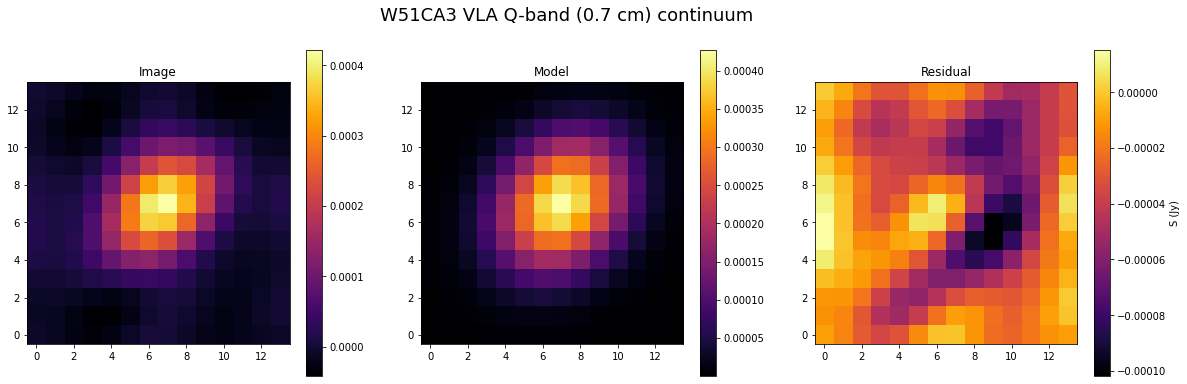

Parameter Error

4.271119828e-04 6.94735536e-05

2.909170738e+02 4.557153165e-10

1.451823611e+01 4.557797599e-10

5.832775194e-06 4.052955854e-10

7.221681941e-06 5.023402987e-10

7.854756405e-01 2.286177789e-04



In [6]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u
from astropy.wcs import WCS
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww = WCS(header)

ypixel_grid, xpixel_grid = np.mgrid[y - size:y + size, x - size:x + size]
xx, yy = ww.pixel_to_world_values(xpixel_grid, ypixel_grid)

xx = (xx * u.deg)
yy = (yy * u.deg)

p_init_gauss2D = models.Gaussian2D(x_mean=xx[size, size], y_mean=yy[size, size], amplitude=1 * (u.Jy/u.beam),
                                   x_stddev= (0.021) * u.arcsec, y_stddev=(0.026) * u.arcsec, theta = (np.pi/4) * u.rad)
#p_init_gauss2D.amplitude.fixed = True

fit_p = fitting.LevMarLSQFitter()

data_cutout_quant = data_cutout

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, data_cutout_quant)
    
cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)

plt.figure(figsize=(20, 6))
plt.suptitle("W51CA3 VLA Q-band (0.7 cm) continuum",fontsize = 18)

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(data_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(data_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')

plt.show()

print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

## FK5 ICRS Conversion

In [7]:
from astropy import coordinates, units as u

coordinates.SkyCoord('19:23:45.05','17:30:30', unit=(u.hour, u.deg), frame='fk5').fk5

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (290.93770833, 17.50833333)>

In [8]:
from astropy import coordinates, units as u

coordinates.SkyCoord('19:23:45.05','17:30:30', unit=(u.hour, u.deg), frame='fk5').icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (290.93770209, 17.50832727)>

#### Finding the Coordinate System for Each FITS

In [9]:
directory1 = '/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits'
directory2 = '/orange/adamginsburg/w51/2017.1.00293.S/may2021_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0'
directory3 = '/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_wproj_selfcal16_final.image.tt0'

ALMA_Band_6_cube = SpectralCube.read(directory1, format='casa_image')
ALMA_Band_3_cube = SpectralCube.read(directory2, format='casa_image')
VLA_QBand_cube   = SpectralCube.read(directory3, format='casa_image')

NotADirectoryError: [Errno 20] Not a directory: '/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits/table.f0'